Tanapol Buangam 6110545511

Stock Market Price Prediction on last 5 years, Dataset from Apple Inc. (AAPL). Analysis apply Machine Learning and Deep Learning Techniques


### 1- Linear-Regression Algorithm
### 2- K-Nearest-Neighbors Algorithm
### 3- Prophet
### 4- Long Term-Short Memory
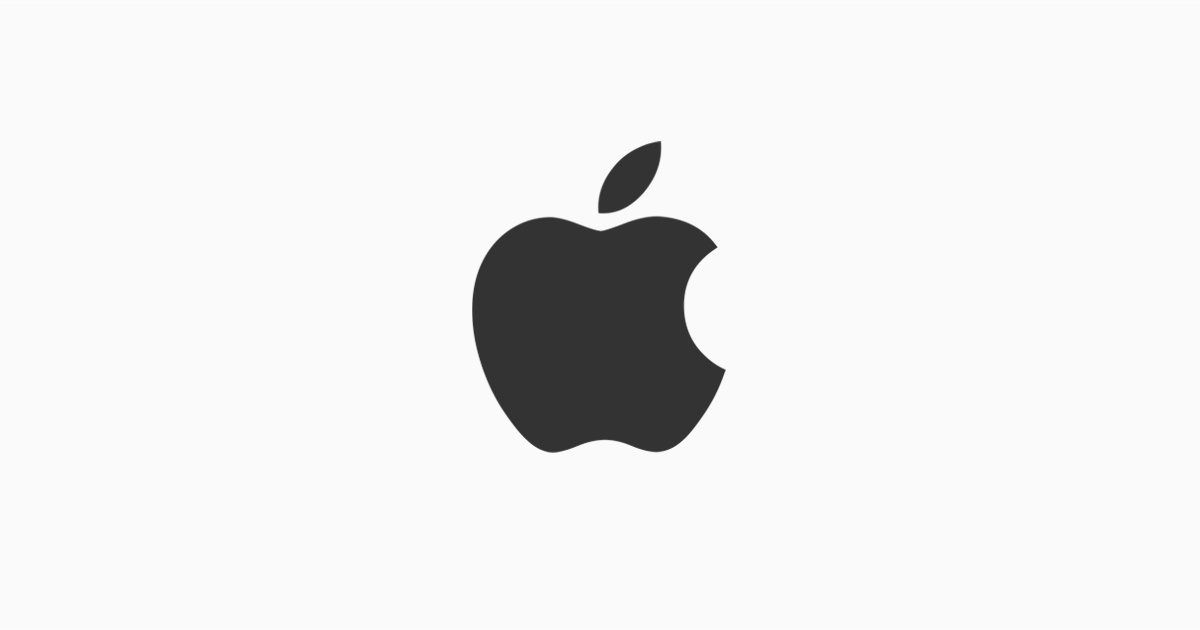

### Install and import data

In [ ]:
pip install fastai

In [ ]:
import pandas as pd
import numpy as np
from fastai.tabular import *

In [ ]:
df = pd.read_csv("AAPL.csv")


### Data Exploration and Visualization


In [ ]:
df

,Date,Open,High,Low,Close,Volume
0,2016-05-10,23.332500,23.392500,23.027500,23.355000,134747200
1,2016-05-11,23.370001,23.392500,23.115000,23.127501,114876400
2,2016-05-12,23.180000,23.195000,22.367500,22.584999,305258800
3,2016-05-13,22.500000,22.917500,22.500000,22.629999,177571200
4,2016-05-16,23.097500,23.597500,22.912500,23.469999,245039200
...,...,...,...,...,...,...
1253,2021-05-03,132.039993,134.070007,131.830002,132.539993,75135100
1254,2021-05-04,131.190002,131.490005,126.699997,127.849998,137564700
1255,2021-05-05,129.199997,130.449997,127.970001,128.100006,84000900
1256,2021-05-06,127.889999,129.750000,127.129997,129.740005,78128300


In [ ]:
#check null value
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
#Show Shape of the data
print(df.shape)

(1258, 6)


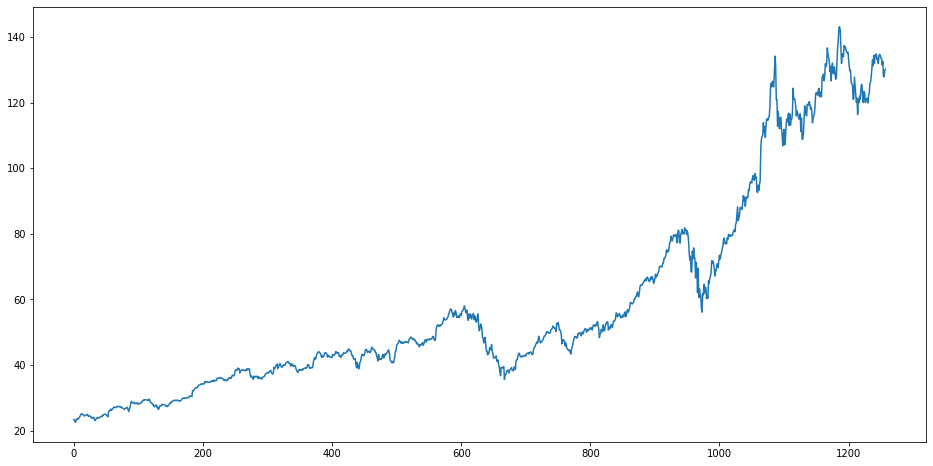

In [ ]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

##LINEAR REGRESSION

In [ ]:
#implement linear regression
from sklearn.linear_model import LinearRegression

In [ ]:
#sorting
data = df.sort_index(ascending=True, axis=0)

In [ ]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']


In [ ]:
#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [ ]:
#create features date
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


In [ ]:
#add date feature
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
#split data to train and valid
train = new_data[:919]
valid = new_data[919:]

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,23.355,2016,5,19,10,1,131,False,False,False,False,False,False,0
1,23.1275,2016,5,19,11,2,132,False,False,False,False,False,False,0
2,22.585,2016,5,19,12,3,133,False,False,False,False,False,False,0
3,22.63,2016,5,19,13,4,134,False,False,False,False,False,False,1
4,23.47,2016,5,20,16,0,137,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,72.4775,2019,12,52,26,3,360,False,False,False,False,False,False,0
915,72.45,2019,12,52,27,4,361,False,False,False,False,False,False,1
916,72.88,2019,12,1,30,0,364,False,False,False,False,False,False,1
917,73.4125,2019,12,1,31,1,365,True,False,True,False,True,False,0


In [ ]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']


In [ ]:
#train the LinearRegression model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#make predictions
preds = model.predict(x_valid)

In [ ]:
#find the rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

45.96083692753877

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


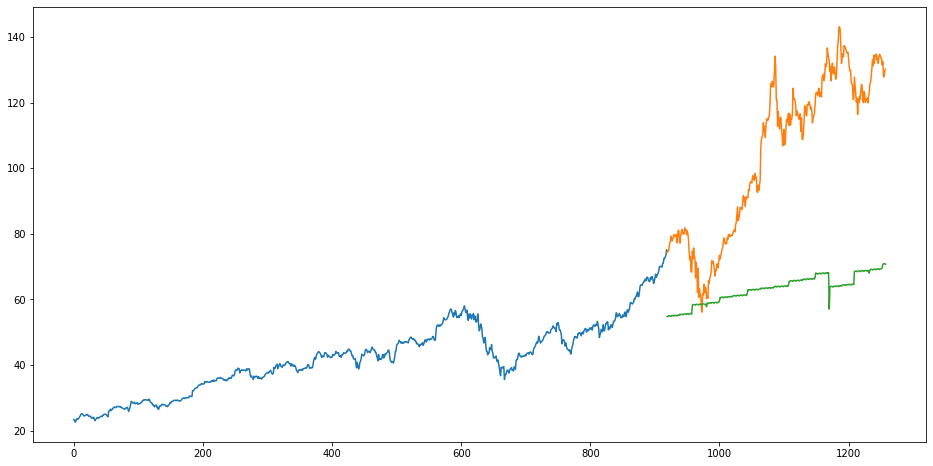

In [ ]:
#plot graph to see the predictions result
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[919:].index
train.index = new_data[:919].index
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

##KNN (K-Nearest-Neighbors)

In [ ]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [ ]:
#sorting
data = df.sort_index(ascending=True, axis=0)

In [ ]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [ ]:
#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [ ]:
#create features date
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
#add date feature
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#split data to train and valid
train = new_data[:919]
valid = new_data[919:]

In [ ]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']


In [ ]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

x_valid

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.000000,0.000000,0.066667,1.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.000000,0.019231,0.166667,0.00,0.008264,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.000000,0.019231,0.200000,0.25,0.011019,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.019231,0.233333,0.50,0.013774,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.019231,0.266667,0.75,0.016529,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,1.0,0.363636,0.326923,0.066667,0.00,0.330579,0.0,0.0,0.0,0.0,0.0,0.0,1.0
335,1.0,0.363636,0.326923,0.100000,0.25,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0
336,1.0,0.363636,0.326923,0.133333,0.50,0.336088,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337,1.0,0.363636,0.326923,0.166667,0.75,0.338843,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#use gridsearch to find the best parameter
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [ ]:
#train the K-Nearest-Neighbors model
model.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#make predictions
preds = model.predict(x_valid)
print(preds)
print('Accuracy of trained model',model.score(x_train,y_train))

[34.790749899999994 36.0382497 31.703499899999997 31.5309996 ... 48.2469997 48.96349980000001 48.4292494
 48.928249699999995]
Accuracy of trained model 0.8583240438120706


In [ ]:
#find the rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

72.34632609376806

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



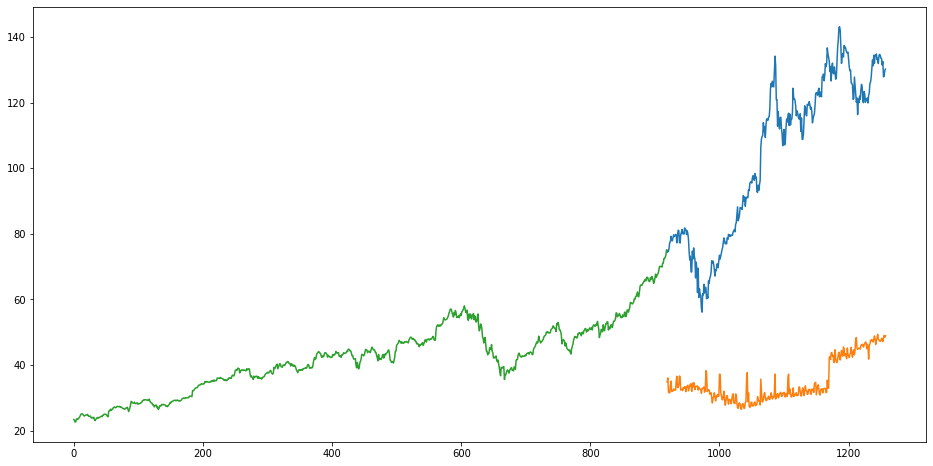

In [ ]:
#plot graph to see the predictions result
plt.figure(figsize=(16,8))
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

##PROPHET

In [ ]:
#importing prophet
from fbprophet import Prophet

In [ ]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

In [ ]:
#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

In [ ]:
#split data to train and valid
train = new_data[:919]
valid = new_data[919:]

In [ ]:
#train the Prophet model
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)


In [ ]:
#find the rmse
forecast_valid = forecast['yhat'][919:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

27.309376651326936

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



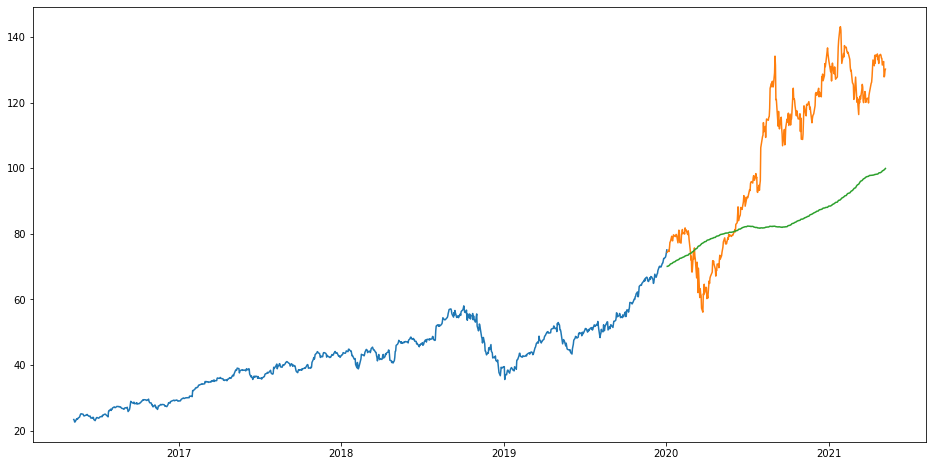

In [ ]:
#plot graph to see the predictions result
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values
plt.figure(figsize=(16,8))
plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

##LSTM ( Long Term-Short Memory)


In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [ ]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
new_data

,Close
Date,
2016-05-10,23.355
2016-05-11,23.1275
2016-05-12,22.585
2016-05-13,22.63
2016-05-16,23.47
...,...
2021-05-03,132.54
2021-05-04,127.85
2021-05-05,128.1


In [ ]:
#creating and split data to train and valid
dataset = new_data.values

train = dataset[0:919,:]
valid = dataset[919:,:]

In [ ]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train.shape

(859, 60)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(859, 60, 1)

In [ ]:
#create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=10, verbose=2)

Epoch 1/10
86/86 - 7s - loss: 0.0023
Epoch 2/10
86/86 - 4s - loss: 2.1814e-04
Epoch 3/10
86/86 - 4s - loss: 2.0249e-04
Epoch 4/10
86/86 - 4s - loss: 1.9228e-04
Epoch 5/10
86/86 - 4s - loss: 1.5792e-04
Epoch 6/10
86/86 - 4s - loss: 1.4965e-04
Epoch 7/10
86/86 - 4s - loss: 1.3825e-04
Epoch 8/10
86/86 - 4s - loss: 1.4677e-04
Epoch 9/10
86/86 - 4s - loss: 1.3071e-04
Epoch 10/10
86/86 - 4s - loss: 1.3004e-04


In [ ]:
#predicting 339 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
#find the rmse
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

5.504396914777273

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



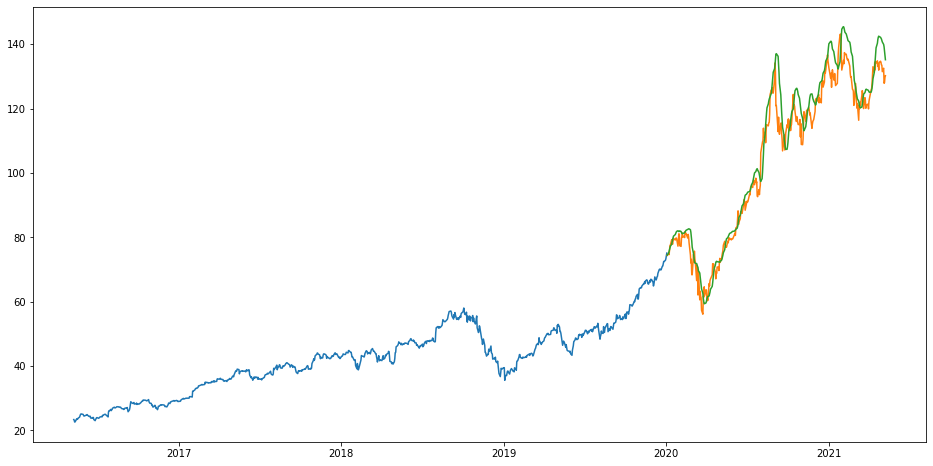

In [ ]:
#plot graph to see the predictions result
plt.figure(figsize=(16,8))
train = new_data[:919]
valid = new_data[919:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])